# A/B —Ç–µ—Å—Ç—ã

## –ó–∞–¥–∞–Ω–∏–µ 1. 
–£ –Ω–∞—Å –µ—Å—Ç—å –¥–∞–Ω–Ω—ã–µ –ê–ê-—Ç–µ—Å—Ç–∞ —Å '2022-07-06' –ø–æ '2022-07-12'. –í–∞–º –Ω—É–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å–∏–º—É–ª—è—Ü–∏—é, –∫–∞–∫ –±—É–¥—Ç–æ –º—ã –ø—Ä–æ–≤–µ–ª–∏ 10000 –ê–ê-—Ç–µ—Å—Ç–æ–≤. –ù–∞ –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ –≤–∞–º –Ω—É–∂–Ω–æ —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å –ø–æ–¥–≤—ã–±–æ—Ä–∫–∏ –±–µ–∑ –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏—è –≤ 500 —é–∑–µ—Ä–æ–≤ –∏–∑ 2 –∏ 3 —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞–ª—å–Ω–æ–π –≥—Ä—É–ø–ø—ã. –ü—Ä–æ–≤–µ—Å—Ç–∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —ç—Ç–∏—Ö –ø–æ–¥–≤—ã–±–æ—Ä–æ–∫ t-test–æ–º.

1. –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ–ª—É—á–∏–≤—à–∏—Ö—Å—è 10000 p-values.

2. –ü–æ—Å—á–∏—Ç–∞—Ç—å, –∫–∞–∫–æ–π –ø—Ä–æ—Ü–µ–Ω—Ç p values –æ–∫–∞–∑–∞–ª—Å—è –º–µ–Ω—å—à–µ –ª–∏–±–æ —Ä–∞–≤–µ–Ω 0.05

3. –ù–∞–ø–∏—Å–∞—Ç—å –≤—ã–≤–æ–¥ –ø–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–º—É –ê–ê-—Ç–µ—Å—Ç—É, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –ª–∏ —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–∞—à–∞ —Å–∏—Å—Ç–µ–º–∞ —Å–ø–ª–∏—Ç–æ–≤–∞–Ω–∏—è.

4. –ü—Ä–∏—à–ª–∏—Ç–µ —Å—Å—ã–ª–∫—É –Ω–∞ merge request c –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω—ã–º –∞–Ω–∞–ª–∏–∑–æ–º.

In [1]:
# –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
import pandas as pd
import numpy as np 
import scipy.stats as stats
import pandahouse as ph
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import ttest_ind
from tqdm import tqdm
from yaml import load, FullLoader

In [2]:
# —Å—Ç–∏–ª–∏
plt.style.use('dark_background')

In [3]:
config = load(open('config_ab.yaml'), Loader=FullLoader)

connection = {
    'host': config['ab tests']['host'],
    'database':'simulator_20220820',
    'user':'student', 
    'password': config['ab tests']['password']
}

In [4]:
def select(query):
    return ph.read_clickhouse(query, connection=connection)

def df_info(data):
    table_info = (
        pd.DataFrame(
            {
                'column_type':data.dtypes,
                'row_count':data.count(),
                'unique_count':data.nunique(),
                'duplicated_count':data.duplicated().sum(),
                'duplicated_pct':data.duplicated().mean(),
                'nan_count':data.isna().sum(),
                'nan_pct':data.isna().mean(),
                'min':data.min(),
                'max':data.max(),
                'mean':data.mean(numeric_only=True)
            }
        )
        .sort_values(by='nan_count',ascending=False)
        .style.format(
            {
                'unique_pct': '{:.1%}',
                'duplicated_pct': '{:.1%}',
                'nan_pct': '{:.1%}',
            }
        )
    )
    return display(table_info)

In [5]:
query = '''
    SELECT exp_group,
           user_id,
           sum(action = 'like') as likes,
           sum(action = 'view') as views,
           likes/views as ctr
    FROM {db}.feed_actions
    WHERE toDate(time) BETWEEN '2022-07-06' AND '2022-07-12' AND exp_group IN (2,3)
    GROUP BY exp_group, user_id
'''

In [6]:
df = select(query)

In [7]:
df_info(df)

In [8]:
df.exp_group.value_counts().to_frame()

exp_group
3       8569
2       8480

–≥—Ä—É–ø–ø—ã –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞

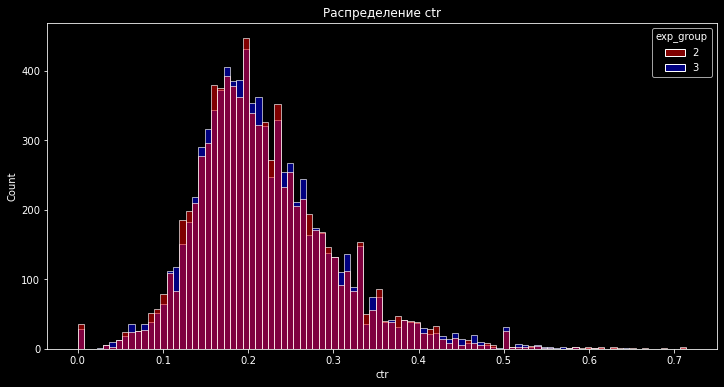

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(
    data=df,
    x='ctr',
    hue='exp_group',
    palette=['r','b'],
    alpha=0.5
)
ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ ctr')
plt.show()

–î–ª—è t-testa –Ω–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, —Ç—Ä–µ–±—É–µ—Ç—Å—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å —Å—Ä–µ–¥–Ω–µ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. C–æ–≥–ª–∞—Å–Ω–æ –¶–ü–¢ —Å–ª—É—á–∞–π–Ω—ã–µ –≤—ã–±–æ—Ä–æ—á–Ω—ã–µ —Å—Ä–µ–¥–Ω–∏–µ –±—É–¥—É—Ç —Å—Ç—Ä–µ–º–∏—Ç—å—Å—è –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é.

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:03<00:00, 3158.87it/s]


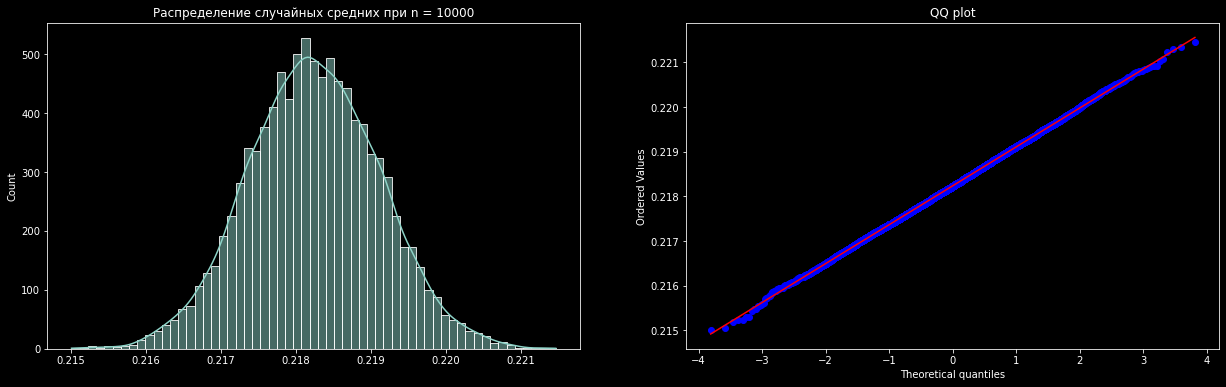

In [10]:
a = df.query('exp_group == 2')['ctr']
n = 10000
a_a = pd.Series([a.sample(len(a),replace=True).mean() for _ in tqdm(range(n))])

fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.histplot(a_a,kde=True,ax=axes[0])
axes[0].set_title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–ª—É—á–∞–π–Ω—ã—Ö —Å—Ä–µ–¥–Ω–∏—Ö –ø—Ä–∏ n = {n}')

stats.probplot(a_a, dist="norm",plot=axes[1])
axes[1].set_title('QQ plot')
plt.show()

–ù–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ –≤–∏–¥–Ω–æ, —á—Ç–æ —Å–ª—É—á–∞–π–Ω—ã–µ —Å—Ä–µ–¥–Ω–∏–µ –∏–º–µ—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –° –ø–æ–º–æ—â—å—é **QQ-plot** –ø—Ä–æ–≤–µ—Ä—è–µ–º, –Ω–æ—Ä–º–∞–ª—å–Ω–æ –ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã —Å–ª—É—á–∞–π–Ω—ã–µ —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è (–∫—Ä–∞—Å–Ω–∞—è –ª–∏–Ω–∏—è —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å —Å–∏–Ω–∏–º–∏ —Ç–æ—á–∫–∞–º–∏).

–ú—ã –±–µ—Ä–µ–º –ø–æ–¥–≤—ã–±–æ—Ä–∫–∏ —Å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å—é 500, –±–µ–∑ –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏—è –≤ –∫–æ—Ä–∑–∏–Ω—É, —Ç.–µ. –∏–∑—ä—è—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —É–Ω–∏–∫–∞–ª—å–Ω—ã, –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —é–∑–µ—Ä–∞ –≤ –¥–∞–Ω–Ω–æ–π –ø–æ–¥–≤—ã–±–æ—Ä–∫–µ –Ω–µ –±—É–¥–µ—Ç, —Ç.–∫. –º—ã –ø—Ä–æ–≤–æ–¥–∏–º ttest, —Ç–æ –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –ø–æ–¥–≤—ã–±–æ—Ä–æ–∫ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ —É—Å–ª–æ–≤–∏–µ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ç–∞–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π, —Ç.–µ. –Ω–µ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–π –≤ –ø–æ–¥–≤—ã–±–æ—Ä–∫–µ.
–ü—Ä–æ–≤–æ–¥–∏–º –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–∞–∫–æ–π –ø–æ–¥–≤—ã–±–æ—Ä–∫–∏ –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ 2 –∏ 3 **ttest** —Å–æ —Å–ª–µ–¥—É—é—â–µ–π –≥–∏–ø–æ—Ç–µ–∑–æ–π:  
  
**H0:** —Å—Ä–µ–¥–Ω–∏–π ctr –≥—Ä—É–ø–ø—ã A $=$ —Å—Ä–µ–¥–Ω–∏–π ctr –≥—Ä—É–ø–ø—ã B  
**H1:**  —Å—Ä–µ–¥–Ω–∏–π ctr –≥—Ä—É–ø–ø—ã A $\not=$ —Å—Ä–µ–¥–Ω–∏–π ctr –≥—Ä—É–ø–ø—ã B
  
–ù–∞ –≤—ã—Ö–æ–¥–µ –ø–æ–ª—É—á–∞–µ–º pvalue, –≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ —Ä–∞–≤–Ω–æ 10000

In [11]:
b_n = 10000
subsample_size = 500

pval = [ttest_ind(
    df.query('exp_group == 2').ctr.sample(subsample_size,replace=False),
    df.query('exp_group == 3').ctr.sample(subsample_size,replace=False),
    equal_var=False
).pvalue for _ in tqdm(range(b_n))]
pval = pd.Series(pval)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:29<00:00, 335.59it/s]


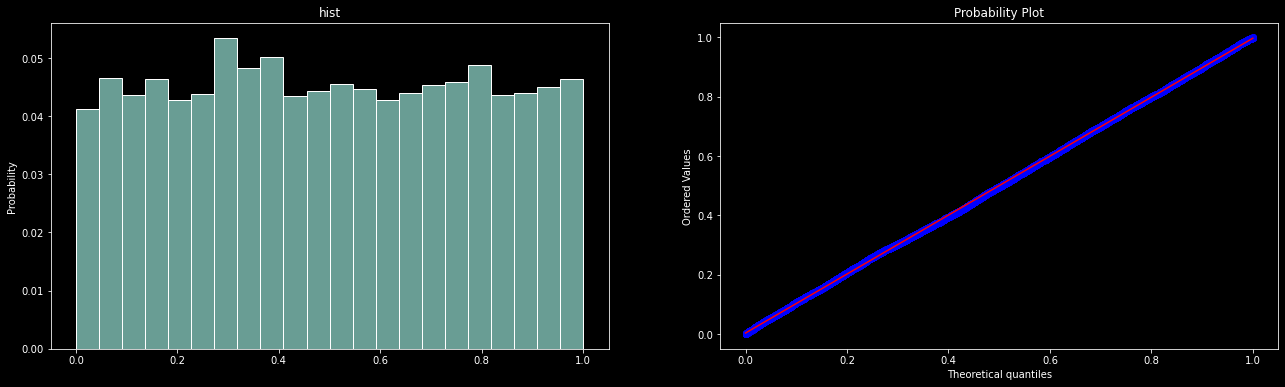

In [12]:
fig, axes = plt.subplots(1,2, figsize=(22, 6))
sns.histplot(pval,stat='probability',ax=axes[0])
stats.probplot(pval, dist="uniform",plot=axes[1])
axes[0].set_title('hist')
plt.show()

–ù–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—ã–≥–ª—è–¥–∏—Ç —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ(–≤—Å–µ —Å—Ç–æ–ª–±—Ü—ã –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–π –≤—ã—Å–æ—Ç—ã), —á—Ç–æ–±—ã —É–±–µ–¥–∏—Ç—å—Å—è –≤ —ç—Ç–æ–º –º–æ–∂–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å probability plot (–∫—Ä–∞—Å–Ω–∞—è –ª–∏–Ω–∏—è —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å —Å–∏–Ω–∏–º–∏ —Ç–æ—á–∫–∞–º–∏).

In [13]:
print('–í {:.2%} —Å–ª—É—á–∞–µ–≤ –Ω–∞–º —É–¥–∞–ª–æ—Å—å –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É'.format((pval < 0.05).mean()))

–í 4.59% —Å–ª—É—á–∞–µ–≤ –Ω–∞–º —É–¥–∞–ª–æ—Å—å –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


### –í—ã–≤–æ–¥:

–ê–ê —Ç–µ—Å—Ç –ø—Ä–æ–≤–æ–¥–∏—Ç—Å—è –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –∏—Å–∫–∞–∂–µ–Ω–∏–π –º–µ—Ç—Ä–∏–∫–∏ (–≤—ã–±—Ä–æ—Å—ã, –¥–∏—Å–ø–µ—Ä—Å–∏—è) –∏ –ø—Ä–æ–≤–µ—Ä–∫–∏ —Å–ø–ª–∏—Ç–æ–≤–∞–Ω–∏—è –≥—Ä—É–ø–ø. –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–æ–∂–Ω–æ–≥–æ —Å—Ä–∞–±–∞—Ç—ã–≤–∞–Ω–∏—è, –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ –≤ 5% –ø–æ–ª—É—á–∞—é—Ç—Å—è —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ (A $\not=$ B), –Ω–∞—à–∞ —Å–∏—Å—Ç–µ–º–∞ —Å–ø–ª–∏—Ç–æ–≤–∞–Ω–∏—è —Ä–∞–±–æ—Ç–∞–µ—Ç –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ.  
–ú–µ—Ç—Ä–∏–∫–∞ ctr –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≤ AB —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ.

---

## –ó–∞–¥–∞–Ω–∏–µ 2. 

–ó–∞–¥–∞—á–∞ ‚Äî –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –êB-—Ç–µ—Å—Ç–∞. 

1.–í—ã–±—Ä–∞—Ç—å –º–µ—Ç–æ–¥ –∞–Ω–∞–ª–∏–∑–∞ –∏ —Å—Ä–∞–≤–Ω–∏—Ç—å CTR –≤ –¥–≤—É—Ö –≥—Ä—É–ø–ø–∞—Ö (–º—ã —Ä–∞–∑–±–∏—Ä–∞–ª–∏ t-—Ç–µ—Å—Ç, –ü—É–∞—Å—Å–æ–Ω–æ–≤—Å–∫–∏–π –±—É—Ç—Å—Ç—Ä–µ–ø, —Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏, t-—Ç–µ—Å—Ç –Ω–∞ —Å–≥–ª–∞–∂–µ–Ω–Ω–æ–º ctr (Œ±=5) –∞ —Ç–∞–∫–∂–µ t-—Ç–µ—Å—Ç –∏ —Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ –ø–æ–≤–µ—Ä—Ö –±–∞–∫–µ—Ç–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è).  
2.–°—Ä–∞–≤–Ω–∏—Ç–µ –¥–∞–Ω–Ω—ã–µ —ç—Ç–∏–º–∏ —Ç–µ—Å—Ç–∞–º–∏. –ê –µ—â–µ –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≥–ª–∞–∑–∞–º–∏. –ü–æ—á–µ–º—É —Ç–µ—Å—Ç—ã —Å—Ä–∞–±–æ—Ç–∞–ª–∏ —Ç–∞–∫ –∫–∞–∫ —Å—Ä–∞–±–æ—Ç–∞–ª–∏?   
3.–û–ø–∏—à–∏—Ç–µ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—É—é —Å–∏—Ç—É–∞—Ü–∏—é, –∫–æ–≥–¥–∞ —Ç–∞–∫–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –º–æ–≥–ª–æ –ø—Ä–æ–∏–∑–æ–π—Ç–∏. –¢—É—Ç –Ω–µ—Ç –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –æ—Ç–≤–µ—Ç–∞, –ø–æ–¥—É–º–∞–π—Ç–µ.  
4.–ù–∞–ø–∏—à–∏—Ç–µ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—é, –±—É–¥–µ–º –ª–∏ –º—ã —Ä–∞—Å–∫–∞—Ç—ã–≤–∞—Ç—å –Ω–æ–≤—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –Ω–∞ –≤—Å–µ—Ö –Ω–æ–≤—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏–ª–∏ –≤—Å–µ-—Ç–∞–∫–∏ –Ω–µ —Å—Ç–æ–∏—Ç.

In [14]:
# —Å–≥–ª–∞–∂–µ–Ω–Ω—ã–π ctr
def get_smothed_ctr(user_likes, user_views, global_ctr, alpha):
    smothed_ctr = (user_likes + alpha * global_ctr) / (user_views + alpha)
    return smothed_ctr

def mannwhitneyu(A,B,alpha=.05):
    m_result = stats.mannwhitneyu(A,B,alternative='two-sided')
    print(f'pvalue: {m_result.pvalue}')
    if m_result.pvalue < alpha:
        print('–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É')
    else:
        print('–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É') 
        
def ttest(A,B,alpha=.05):
    t_result = ttest_ind(A,B,equal_var=False)
    print(f'pvalue: {t_result.pvalue}')
    if t_result.pvalue < alpha:
        print('–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É')
    else:
        print('–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É') 

def bootstrap(grp1,grp2,n_bootstrap=2000):
    likes_1 = grp1.likes.to_numpy()
    likes_2 = grp2.likes.to_numpy()
    views_1 = grp1.views.to_numpy()
    views_2 = grp2.views.to_numpy()
    
    weights_1 = stats.poisson(1).rvs(
        (n_bootstrap, len(likes_1))).astype(np.int64)
    weights_2 = stats.poisson(1).rvs(
        (n_bootstrap, len(likes_2))).astype(np.int64) 
    
    globalCTR_1 = (likes_1 * weights_1).sum(axis=1)/(views_1 * weights_1).sum(axis=1)
    globalCTR_2 = (likes_2 * weights_2).sum(axis=1)/(views_2 * weights_2).sum(axis=1)
    return globalCTR_1, globalCTR_2

In [15]:
query = '''
    SELECT exp_group,
           user_id,
           sum(action = 'like') as likes,
           sum(action = 'view') as views,
           likes/views as ctr
    FROM {db}.feed_actions
    WHERE toDate(time) BETWEEN '2022-07-13' AND '2022-07-19' AND exp_group IN (1,2)
    GROUP BY exp_group, user_id
'''

In [16]:
df = select(query)

In [17]:
df_info(df)

In [18]:
df.exp_group.value_counts().to_frame()

exp_group
1      10079
2       9952

In [19]:
A_sample = df[df['exp_group'] == 2].copy()
B_sample = df[df['exp_group'] == 1].copy()

A_sample['smothed_ctr'] = df.apply(
    lambda x: get_smothed_ctr(x['likes'], x['views'], A_sample.ctr.sum(), 5), axis=1)
B_sample['smothed_ctr'] = df.apply(
    lambda x: get_smothed_ctr(x['likes'], x['views'], B_sample.ctr.sum(), 5), axis=1)

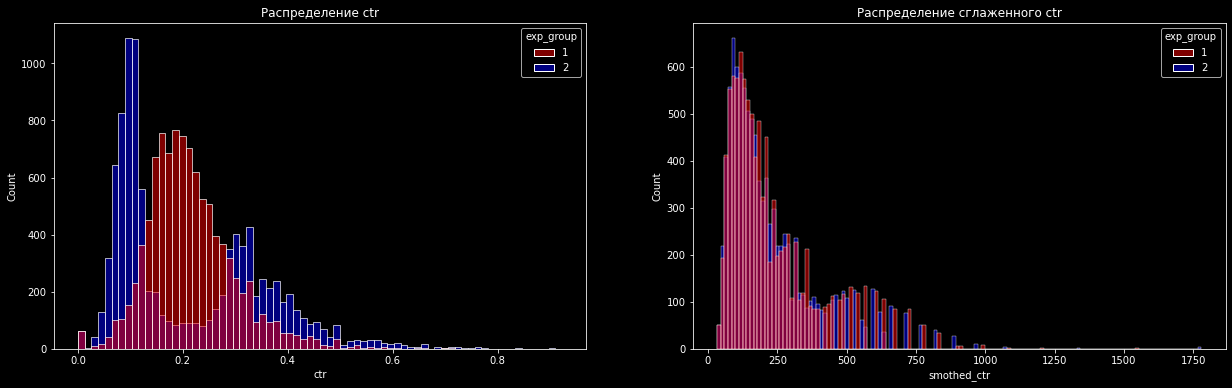

In [20]:
fig, ax = plt.subplots(1,2, figsize=(21, 6))
sns.histplot(
    data=df,
    x='ctr',
    hue='exp_group',
    palette=['r','b'],
    alpha=0.5,
    ax=ax[0])
sns.histplot(
    data=pd.concat([A_sample, B_sample]),
    x='smothed_ctr',
    hue='exp_group',
    palette=['r','b'],
    alpha=0.5,
    ax=ax[1])
ax[0].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ ctr')
ax[1].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–≥–ª–∞–∂–µ–Ω–Ω–æ–≥–æ ctr')
plt.show()

—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è ctr –¥–≤—É—Ö –≥—Ä—É–ø–ø —Ä–∞–∑–ª–∏—á–Ω—ã

In [21]:
data = {
    'A_mean': A_sample.ctr.mean(),
    'B_mean': B_sample.ctr.mean(),
    'A_std': np.std(A_sample.ctr,ddof=1),
    'B_std': np.std(B_sample.ctr,ddof=1)
}
pd.Series(data).to_frame().T

A_mean    B_mean    A_std    B_std
0  0.214419  0.215605  0.14418  0.08416

–°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫–∏ ctr –¥–ª—è –¥–≤—É—Ö –≥—Ä—É–ø–ø –ø–æ—Ö–æ–∂–∏, –≤—Ä—è–¥ –ª–∏ ttest –∑–∞–º–µ—Ç–∏—Ç —Ä–∞–∑–ª–∏—á–∏—è 

### ttest

–°—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º –Ω—É–ª–µ–≤—É—é –∏ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—É—é –≥–∏–ø–æ—Ç–µ–∑—ã:  
**H0** - CTR –Ω–æ–≤–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –≤–æ 2-–π –≥—Ä—É–ø–ø–µ $=$ CTR —Å—Ç–∞—Ä–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –≤ 1-–π –≥—Ä—É–ø–ø–µ  
**H1** - CTR –Ω–æ–≤–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –≤–æ 2-–π –≥—Ä—É–ø–ø–µ $>$ CTR —Å—Ç–∞—Ä–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –≤ 1-–π –≥—Ä—É–ø–ø–µ  

–£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ $\alpha = 0.05$

In [22]:
# –¥–ª—è ctr
ttest(A_sample.ctr,B_sample.ctr)

pvalue: 0.4780623130874935
–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


In [23]:
# –¥–ª—è —Å–≥–ª–∞–∂–µ–Ω–Ω–æ–≥–æ ctr
ttest(A_sample.smothed_ctr,B_sample.smothed_ctr)

pvalue: 0.4476506334224234
–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


ttest –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É, —Ç.–µ. —Ä–∞–∑–ª–∏—á–∏–π –Ω–µ—Ç, –Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è ctr –¥–≤—É—Ö –≥—Ä—É–ø–ø —Ä–∞–∑–ª–∏—á–Ω—ã

### —Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-—É–∏—Ç–Ω–∏

In [24]:
mannwhitneyu(A_sample.ctr,B_sample.ctr)

pvalue: 6.0376484617779035e-56
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


–ú–∞–Ω–Ω-—É–∏—Ç–Ω–∏ –≤–∏–¥–∏—Ç —Ä–∞–∑–ª–∏—á–∏—è –≤ –≥—Ä—É–ø–ø–∞—Ö

### –±—É—Ç—Å—Ç—Ä–µ–ø

In [25]:
ctr_1, ctr_2 = bootstrap(A_sample,B_sample)

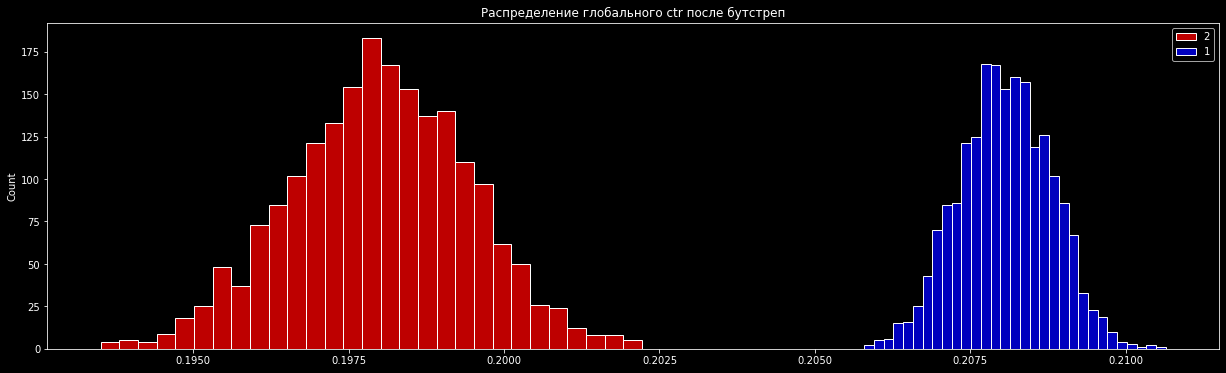

In [26]:
fig = plt.subplots(figsize=(21, 6))
sns.histplot(ctr_1,color='r', label='2')
sns.histplot(ctr_2,color='b', label='1')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≥–ª–æ–±–∞–ª—å–Ω–æ–≥–æ ctr –ø–æ—Å–ª–µ –±—É—Ç—Å—Ç—Ä–µ–ø')
plt.legend()
plt.show()

–∑–Ω–∞—á–µ–Ω–∏—è –≥—Ä—É–ø–ø—ã 2(–Ω–æ–≤—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º) –∏ 1 –¥–∞–∂–µ –Ω–µ –ø–µ—Ä–µ—Å–µ–∫–∞—é—Ç—Å—è, –≥–ª–æ–±–∞–ª—å–Ω—ã–π ctr –≥—Ä—É–ø–ø—ã 1 –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ª—É—á—à–µ, —á–µ–º –≥—Ä—É–ø–ø—ã 2

### –±–∞–∫–µ—Ç—ã

In [27]:
query = """
    SELECT exp_group,
           xxHash64(user_id)%50 as bucket,
           sum(action = 'like') as likes,
           sum(action = 'view') as views,
           likes/views as ctr
    FROM {db}.feed_actions
    WHERE toDate(time) BETWEEN '2022-07-13' AND '2022-07-19' AND exp_group IN (1,2)
    GROUP BY exp_group, bucket
"""

In [28]:
buckets_df = select(query)
buckets_df.head()

exp_group  bucket  likes  views       ctr
0          1       0   2624  13355  0.196481
1          2       0   2634  13559  0.194262
2          1       1   2681  12653  0.211887
3          2       1   2686  12474  0.215328
4          1       2   3046  14767  0.206271

In [29]:
A_sample_b = buckets_df[buckets_df['exp_group'] == 2].copy()
B_sample_b = buckets_df[buckets_df['exp_group'] == 1].copy()

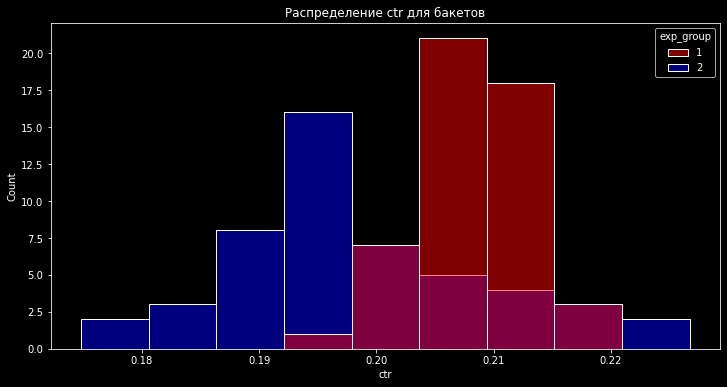

In [30]:
fig = plt.subplots(1, figsize=(12,6))
sns.histplot(data=buckets_df, x='ctr', hue='exp_group', palette=['r', 'b'])
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ ctr –¥–ª—è –±–∞–∫–µ—Ç–æ–≤')
plt.show()

In [31]:
mannwhitneyu(A_sample_b.ctr,B_sample_b.ctr)

pvalue: 2.859963936492646e-07
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


In [32]:
ttest(A_sample_b.ctr,B_sample_b.ctr)

pvalue: 3.4455951649945907e-07
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


### –í—ã–≤–æ–¥:

–û—Å–Ω–æ–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ç–æ–º, —á—Ç–æ –Ω–æ–≤—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –≤–æ 2-–π –≥—Ä—É–ø–ø–µ –ø—Ä–∏–≤–µ–¥–µ—Ç –∫ —É–≤–µ–ª–∏—á–µ–Ω–∏—é CTR.  
–ü–æ –∏—Ç–æ–≥–∞–º A/B —Ç–µ—Å—Ç–æ–≤:
* –±—É—Å—Ç—Ä–µ–ø –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –∑–Ω–∞—á–µ–Ω–∏—è CTR –¥–ª—è –Ω–æ–≤–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —Ö—É–∂–µ –∑–Ω–∞—á–µ–Ω–∏–π CTR —Å—Ç–∞—Ä–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞
* –±–∞–∫–µ—Ç–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø–æ–∫–∞–∑–∞–ª–æ, —á—Ç–æ ctr –¥–ª—è –Ω–æ–≤–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ —Ö—É–∂–µ —Å—Ç–∞—Ä–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞, –∞ —Ç–µ—Å—Ç –º–∞–Ω–Ω–∞-—É–∏—Ç–Ω–∏ –∏ —Ç—Ç–µ—Å—Ç –≤–∏–¥–∏—Ç —Ä–∞–∑–ª–∏—á–∏—è  

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ ctr –≤ –Ω–æ–≤–æ–º –∞–ª–≥–æ—Ä–∏—Ç–º–µ —É—Å–ª–æ–≤–Ω–æ —Ä–∞–∑–¥–µ–ª–∏–ª–æ—Å—å –Ω–∞ –¥–≤–∞ –ø–æ–ª—é—Å–∞, –≥–¥–µ —á–∞—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏–π CTR –¥–ª—è —é–∑–µ—Ä–æ–≤ —Å—Ç–∞–ª–∞ —Ö—É–∂–µ –∏ —á–∞—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏–π —Å—Ç–∞–ª–∞ –ª—É—á—à–µ. –í–æ–∑–º–æ–∂–Ω–æ –∞–ª–≥–æ—Ä–∏—Ç–º –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –æ–±—É—á–µ–Ω, —á—Ç–æ –æ–Ω –ø–æ–º–µ—á–∞–µ—Ç –Ω–µ–≤–µ—Ä–Ω–æ —Ü–µ–ª–µ–≤—ã–µ –ø–æ—Å—Ç—ã, —Å–ª–µ–¥—É–µ—Ç –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–æ—Ä–≤–∞—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º –∏ –≤—ã—è—Å–Ω–∏—Ç—å –ø–æ—á–µ–º—É —á–∞—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏–π –∏–º–µ–µ—Ç –±–æ–ª–µ–µ –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ –º–µ—Ç—Ä–∏–∫–µ ctr, –∞ —á–∞—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏–π —Å—Ç–∞–ª–∞ —Ö—É–∂–µ. –ù–∞ –¥–∞–Ω–Ω—ã–π –º–æ–º–µ–Ω—Ç –Ω–µ —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–æ–≤—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –Ω–∞ –≤—Å–µ—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.

---

## –ó–∞–¥–∞–Ω–∏–µ 3. 

**–ó–∞–¥–∞—á–∞**  
–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ç–µ—Å—Ç –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ 0 –∏ 3 –ø–æ –º–µ—Ç—Ä–∏–∫–µ –ª–∏–Ω–µ–∞—Ä–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –ª–∞–π–∫–æ–≤. –í–∏–¥–Ω–æ –ª–∏ –æ—Ç–ª–∏—á–∏–µ? –°—Ç–∞–ª–æ –ª–∏ ùëù‚àíùë£ùëéùëôùë¢ùëí –º–µ–Ω—å—à–µ?  
–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ç–µ—Å—Ç –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ 1 –∏ 2 –ø–æ –º–µ—Ç—Ä–∏–∫–µ –ª–∏–Ω–µ–∞—Ä–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –ª–∞–π–∫–æ–≤. –í–∏–¥–Ω–æ –ª–∏ –æ—Ç–ª–∏—á–∏–µ? –°—Ç–∞–ª–æ –ª–∏ ùëù‚àíùë£ùëéùëôùë¢ùëí –º–µ–Ω—å—à–µ?

In [33]:
def hist(data):
    x = 'linearized_likes'
    sns.histplot(
    data=data,
    x=x,
    hue='exp_group',
    palette=['r','b'],
    alpha=0.5
).set_title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ {x}')

### –ì—Ä—É–ø–ø—ã 0 –∏ 3

**H0**: group 1 $=$ group 2  
**H1**: group 1 $\not=$ group 2

In [34]:
query = '''
    SELECT exp_group,
           user_id,
           sum(action = 'like') as likes,
           sum(action = 'view') as views,
           likes/views as ctr
    FROM {db}.feed_actions
    WHERE toDate(time) BETWEEN '2022-07-13' AND '2022-07-19' AND exp_group IN (0,3)
    GROUP BY exp_group, user_id
'''

In [35]:
df = select(query)

In [36]:
ctr_control = df.query('exp_group == 0').likes.sum() / df.query('exp_group == 0').views.sum()
df['linearized_likes'] = df.likes - ctr_control * df.views
A_grp = df.query('exp_group == 0')
B_grp = df.query('exp_group == 3')

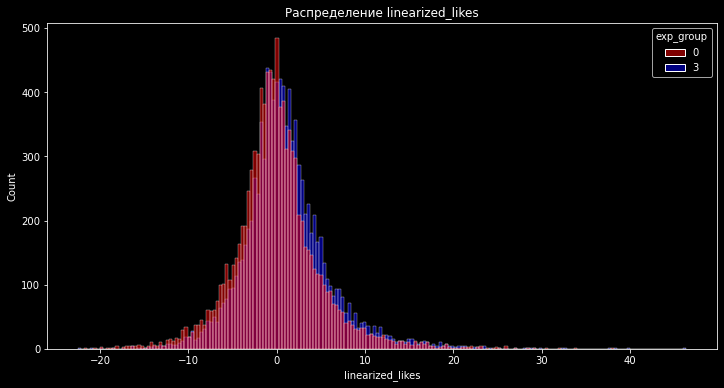

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))
hist(df)
plt.show()

In [38]:
ttest(A_grp.ctr,B_grp.ctr)

pvalue: 1.055849414662529e-43
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


In [39]:
ttest(A_grp.linearized_likes,B_grp.linearized_likes)

pvalue: 5.4914249479687664e-52
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


–≤ –¥–∞–Ω–Ω—ã—Ö –≥—Ä—É–ø–ø–∞—Ö —Ç—Ç–µ—Å—Ç –≤–∏–¥–∏—Ç —Ä–∞–∑–ª–∏—á–∏—è –º–µ–∂–¥—É –Ω–∏–º–∏

### –ì—Ä—É–ø–ø—ã 1 –∏ 2

**H0**: group 1 $=$ group 2  
**H1**: group 1 $\not=$ group 2

In [40]:
query = '''
    SELECT exp_group,
           user_id,
           sum(action = 'like') as likes,
           sum(action = 'view') as views,
           likes/views as ctr
    FROM {db}.feed_actions
    WHERE toDate(time) BETWEEN '2022-07-13' AND '2022-07-19' AND exp_group IN (1,2)
    GROUP BY exp_group, user_id
'''

In [41]:
df2 = select(query)

In [42]:
ctr_control = df2.query('exp_group == 1').likes.sum() / df2.query('exp_group == 1').views.sum()
df2['linearized_likes'] = df2.likes - ctr_control * df2.views
A_grp_1 = df2.query('exp_group == 1')
B_grp_2 = df2.query('exp_group == 2')

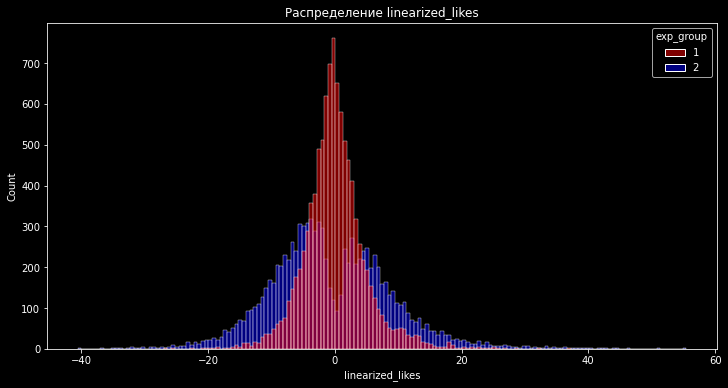

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))
hist(df2)
plt.show()

—Ä–∞—Å–ø—Ä–µ–¥–µ–Ω–∏–µ –≥—Ä—É–ø–ø—ã 2 —Å—Ç–∞–ª–æ –±–æ–ª–µ–µ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º

In [44]:
ttest(A_grp_1.ctr,B_grp_2.ctr)

pvalue: 0.4780623130874935
–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


In [45]:
ttest(A_grp_1.linearized_likes,B_grp_2.linearized_likes)

pvalue: 9.439432187037712e-10
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


–õ–∏–Ω–µ–∞—Ä–∏–∑–æ–≤–∞–Ω–Ω–∞—è –º–µ—Ç—Ä–∏–∫–∞ –ø–æ–≤—ã—Å–∏–ª–∞ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ç–µ—Å—Ç–∞, —á—Ç–æ –ø–æ–∑–≤–æ–ª–∏–ª–æ —É–≤–∏–¥–∏—Ç—å —Ä–∞–∑–ª–∏—á–∏—è –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏.